In [2]:
import pdb

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("../data/interum/top_genres.csv")

## Subset numerical data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107973 entries, 0 to 107972
Data columns (total 26 columns):
Name                      107972 non-null object
Danceability              107973 non-null float64
Energy                    107973 non-null float64
Key                       107973 non-null float64
Loudness                  107973 non-null float64
Mode                      107973 non-null float64
Speechness                107973 non-null float64
Acousticness              107973 non-null float64
Instrumentalness          107973 non-null float64
Liveness                  107973 non-null float64
Valence                   107973 non-null float64
Tempo                     107973 non-null float64
Type                      107973 non-null object
ID                        107973 non-null object
Uri                       107973 non-null object
Ref_Track                 107973 non-null object
URL_features              107973 non-null object
Duration_ms               107973 non-null flo

In [15]:
numerical = data[[
    "Danceability",
    "Energy",
#     "Key",
    "Loudness",
#     "Mode",
    "Speechness",
    "Acousticness",
    "Instrumentalness",
    "Liveness",
    "Valence",
    "Tempo",
    "Duration_ms",
    
]]

In [16]:
numerical.describe()

,Danceability,Energy,Loudness,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
count,107973.000000,107973.000000,107973.000000,107973.000000,107973.000000,107973.000000,107973.000000,107973.000000,107973.000000,1.079730e+05
mean,0.550963,0.642299,-8.671973,0.084604,0.279791,0.241153,0.194109,0.465391,121.812796,2.549906e+05
std,0.184471,0.249686,4.916737,0.102570,0.328708,0.358198,0.164054,0.267500,29.113351,1.285168e+05
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.576000e+03
25%,0.427000,0.477000,-10.570000,0.036100,0.008130,0.000002,0.095100,0.239000,99.946000,1.909600e+05
50%,0.564000,0.683000,-7.479000,0.048500,0.114000,0.001990,0.125000,0.453000,120.970000,2.299600e+05
75%,0.691000,0.851000,-5.397000,0.083900,0.513000,0.557000,0.247000,0.681000,139.951000,2.878930e+05
max,0.988000,1.000000,5.056000,0.966000,0.996000,0.999000,1.000000,1.000000,248.066000,5.949886e+06


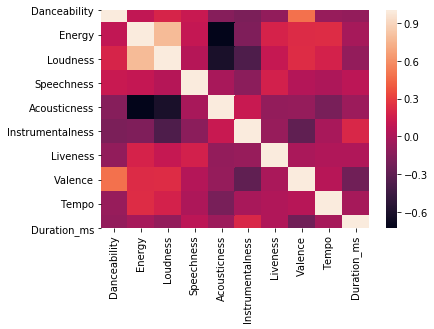

In [17]:
sns.heatmap(numerical.corr())

In [29]:
def plot_scatter_relationship(data, x, y="Valence"):
    plt.scatter(x=data[x], y=data[y], alpha=0.1)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs. {y}")

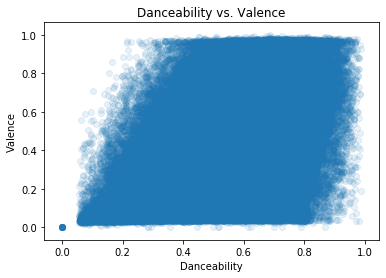

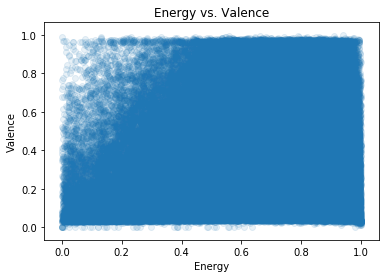

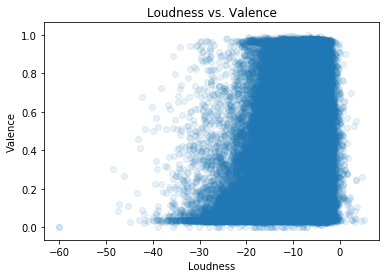

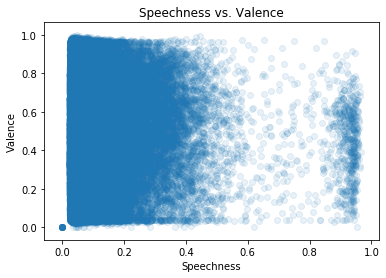

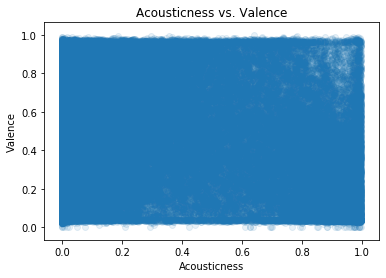

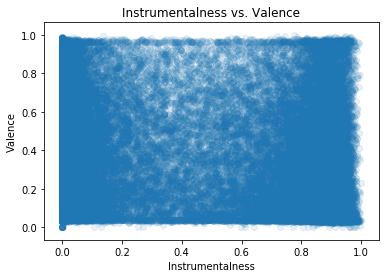

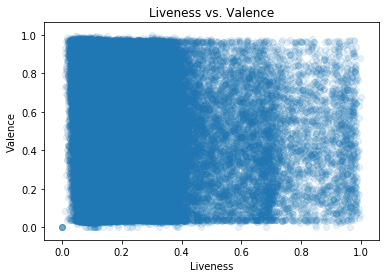

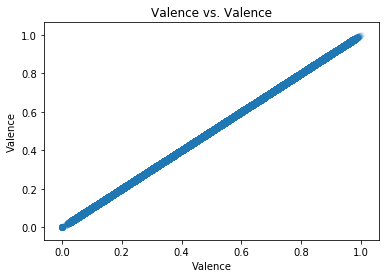

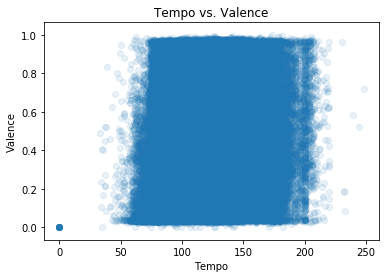

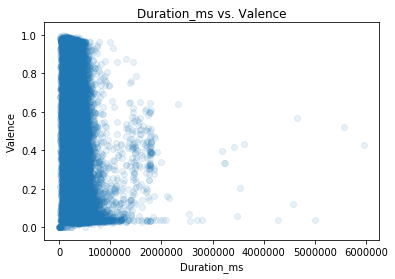

In [30]:
for variable in list(numerical.columns):
    plot_scatter_relationship(numerical, variable)
    plt.show()

In [69]:
np.array(numerical.Valence).reshape(-1,1)

array([[0.324],
       [0.444],
       [0.297],
       ...,
       [0.53 ],
       [0.569],
       [0.571]])

In [75]:
from sklearn.preprocessing import MinMaxScaler

def plot_distributions(data, x):
    scaler = MinMaxScaler()
    sns.distplot(a=scaler.fit(np.array(data[x]).reshape(-1,1)).transform(np.array(data[x]).reshape(-1,1)), bins=500)
    plt.title(x)
    plt.show()


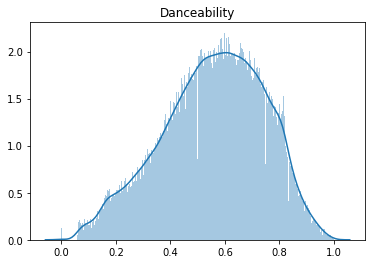

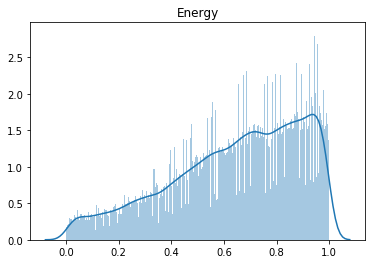

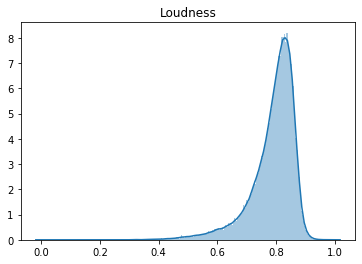

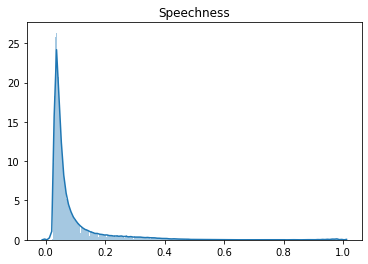

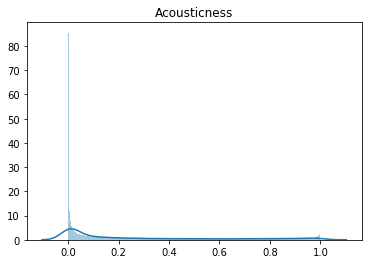

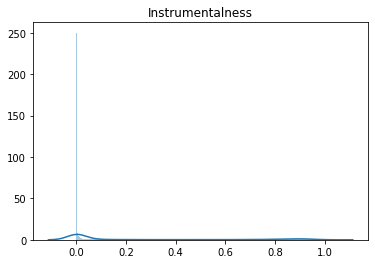

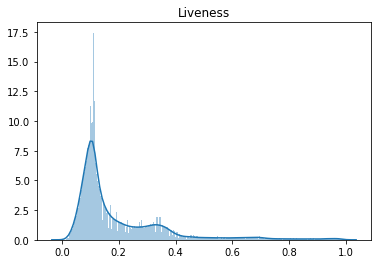

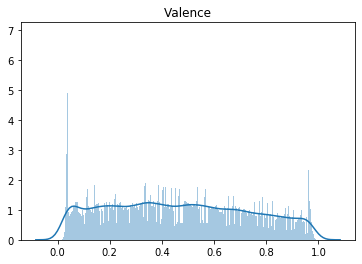

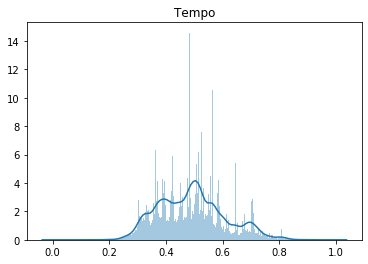

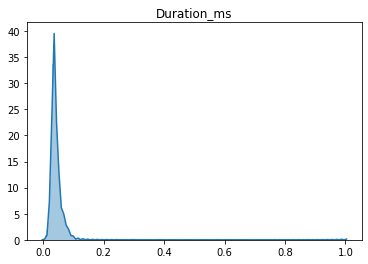

In [76]:
for variable in list(numerical.columns):
    plot_distributions(numerical, variable)

In [91]:
from sklearn.preprocessing import StandardScaler

def log_variable(series):
    new_vals = []
    for v in series:
        
        if v == 0:
            new_vals.append(0)
        else:
            new_vals.append(np.log(v))
    return new_vals
        

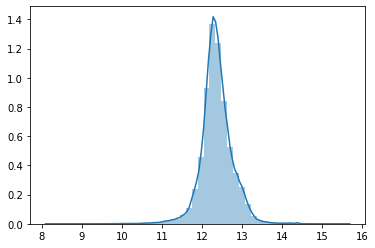

In [95]:
sns.distplot(log_variable(numerical.Duration_ms))

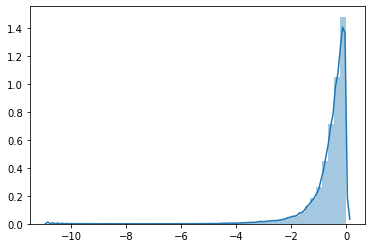

In [101]:
sns.distplot(log_variable(numerical.))

Logs with

```
from sklearn.preprocessing import StandardScaler

def log_variable(series):
    new_vals = []
    for v in series:
        
        if v == 0:
            new_vals.append(0)
        else:
            new_vals.append(np.log(v))
    return new_vals
```

* Duration_ms
* Liveness